# Computational Guided Inquiry for Polar Research

## Processing Sea Ice Images - 2 Image Repair

### Learning Objectives
1. Learn how to use median filtering to remove noise from an image.
2. Learn how to use the built-in function "medflt" from a signal processing module (scipy.signal).

### Pre-class activities
1. Read Section 2.2 on Image Repair in the Image Processing pdf. 
3. Describe the conditions for pixels to be neighbors.
4. Describe what medfilt does.


In [1]:
# Following are the modules we will need.

# For plotting
import matplotlib
import matplotlib.pyplot as plt

# For reading in files
from scipy import misc
import imageio


#from PIL import Image
import copy
import numpy as np

# Import medfilt from the scipy.signal module
from scipy.signal import medfilt

# Edge detection filters
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.feature import canny



## 2.2 Image Repair

Write a Python program to clean up unwanted specks in the provided image.

1. Read in and display the contaminated image: N_198111_extn_v2.1.png, which can be downloaded from the WISE site under project 5, image folder.
2. Convert the figure to black and white, crop it to include only the central image, and display again.
3. Perform a median filter for each of the pixel value.
4. Display the repaired image.
5. Try to use the mean instead of median to generate a new filtered image for comparison.
6. Use \mymatlab~built-in function medfilt2 for similar image repair result.
7. (Advanced) Write the median filter into a function: medianfilter, which takes a contaminated image as input and produces a repaired image as output.


### 2.2.1. Read in and display the image: N_198111_extn_v2.1.png

<IPython.core.display.Javascript object>


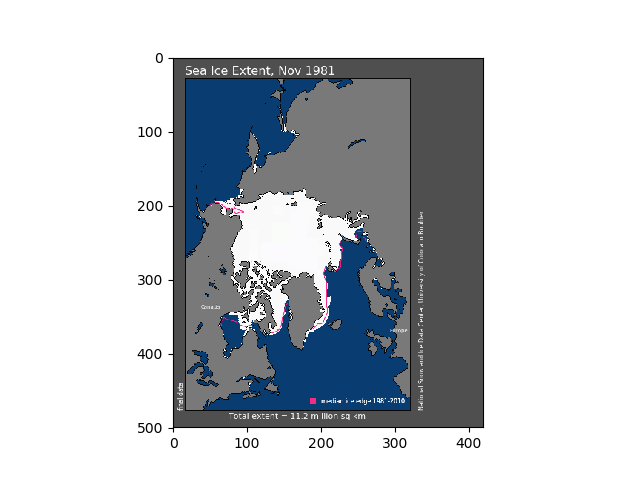

In [3]:
# Print inline figures that can be saved
%matplotlib notebook

A = imageio.imread('N_198111_extn_v2.1_edited.png')
plt.imshow(A)


### 2.2.2 Convert the figure to black and white, crop it to include only the central image, and display again.

<IPython.core.display.Javascript object>


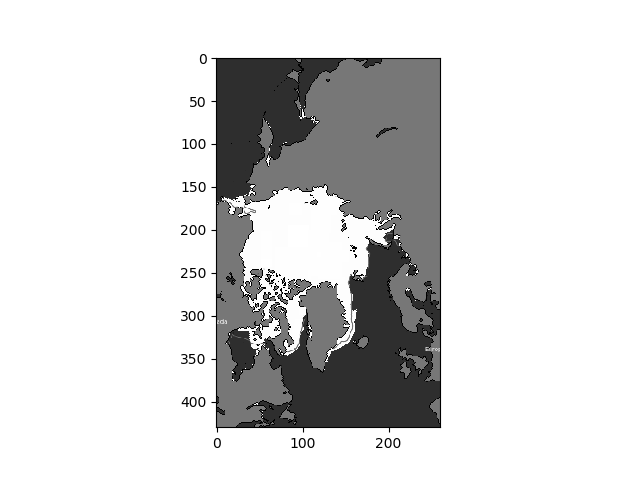

In [4]:
# Convert to black and white
A_bw = 0.299*A[:, :, 0] + 0.587*A[:, :, 1] + 0.114*A[:, :, 2] 

# Crop to include only the central box
A_bw = A_bw[30:460, 50:310]

plt.figure()
plt.imshow(A_bw, cmap='gray')


<IPython.core.display.Javascript object>


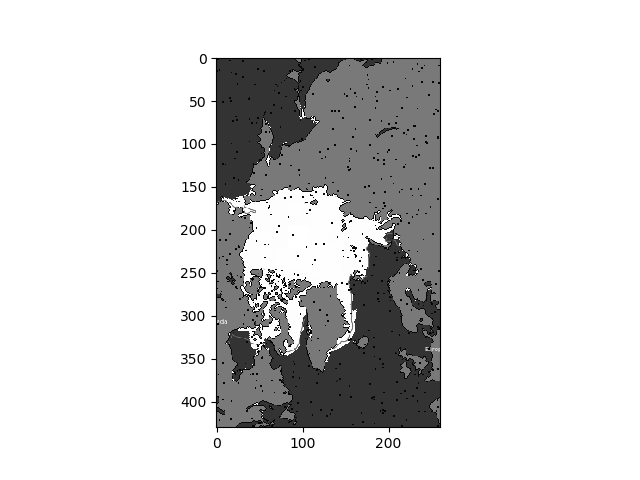

In [6]:
# Add some noise to the image, save it and display it again

A_bw_dirty = copy.deepcopy(A_bw) 
 
Num_specks = 500
for k in range(Num_specks):
    i = int(np.floor(np.random.rand(1) * (A_bw.shape[0]-1) )); 
    j = int(np.floor(np.random.rand(1) * (A_bw.shape[1]-1) ));
    A_bw_dirty[i:i+2, j:j+2] = np.floor(10 * np.random.rand(2,2)); 


plt.figure()
plt.imshow(A_bw_dirty, cmap='gray')


### 2.2.3 Perform a median filter for each of the pixel values.

In [7]:
A_clean = copy.deepcopy(A_bw_dirty)
m = A_bw_dirty.shape[0]; n = A_bw_dirty.shape[1]; #print(m); print(n)
for i in range(m):
    for j in range(n):
        
        # The 3-by-3 matrix of neighbors
        iMin = np.max([1, i - 1])
        iMax = np.min([m, i + 2])
        jMin = np.max([1, j - 1])
        jMax = np.min([n, j + 2])
        Neighbors = copy.deepcopy(A_bw_dirty[iMin : iMax, jMin : jMax]); 
        
        # The median value
        # : convert matrix into 1-dimension array (column-major)
        A_clean[i, j] = np.median(Neighbors[:])

### 2.2.4. Display the repaired image.

<IPython.core.display.Javascript object>


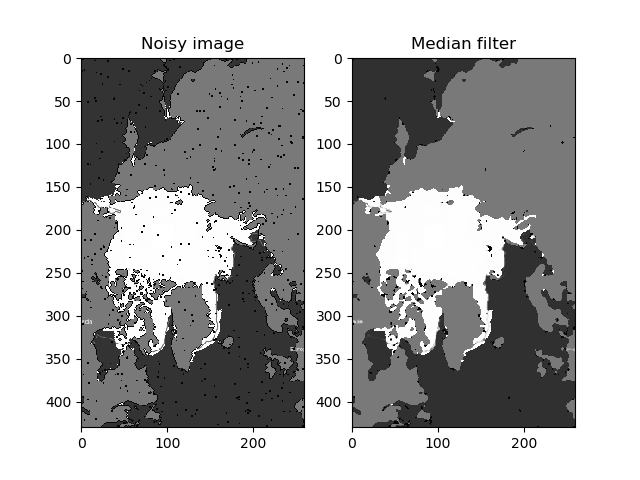

Text(0.5,1,'Median filter')

In [17]:

plt.figure()
plt.subplot(121)
plt.imshow(A_bw_dirty, cmap='gray')
plt.title('Noisy image')

plt.subplot(122)
plt.imshow(A_clean, cmap='gray')
plt.title('Median filter')


<IPython.core.display.Javascript object>


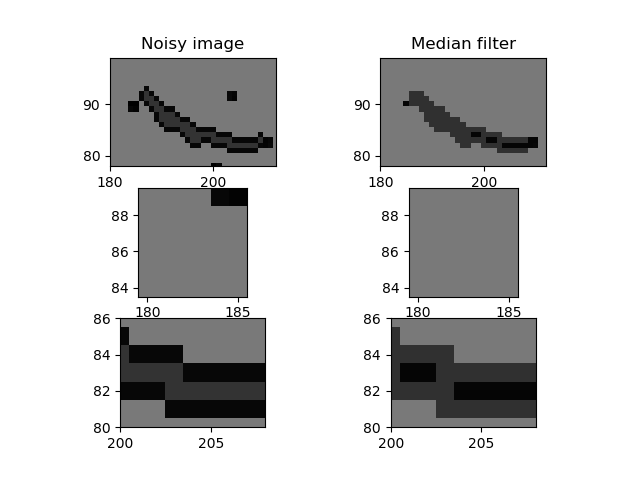

(80, 86)

In [18]:
# zoom in on smaller regions to see what the filter did

plt.figure()
plt.subplot(321)
plt.imshow(A_bw_dirty,cmap='gray')
plt.title('Noisy image')
plt.xlim([180,212]); plt.ylim([78,99])

# Lake region
plt.subplot(322)
plt.imshow(A_clean,cmap='gray')
plt.title('Median filter')
plt.xlim([180,212]); plt.ylim([78,99])

plt.subplot(323)
plt.imshow(A_bw_dirty,cmap='gray')
plt.xlim([179.5,185.5]); plt.ylim([83.5,89.5])

# A single pixel
plt.subplot(324)
plt.imshow(A_clean,cmap='gray')
plt.xlim([179.5,185.5]); plt.ylim([83.5,89.5])

# part of lake
plt.subplot(325)
plt.imshow(A_bw_dirty,cmap='gray')
plt.xlim([200,208]); plt.ylim([80,86])

plt.subplot(326)
plt.imshow(A_clean,cmap='gray')
plt.xlim([200,208]); plt.ylim([80,86])


# Hint: stretch out the figure by clicking and dragging the triangle
# in the lower right.


### 2.2.5. Try to use the mean instead of median to generate a new filtered image for comparison.

430
260


<IPython.core.display.Javascript object>


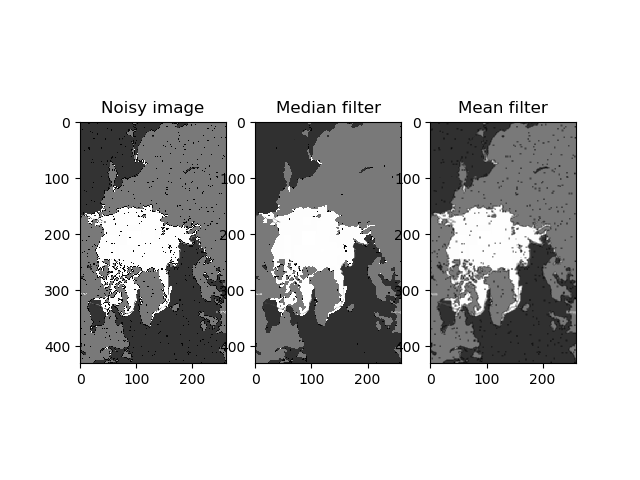

Text(0.5,1,'Mean filter')

In [19]:
A_mean = copy.deepcopy(A_bw_dirty)
m = A_bw_dirty.shape[0]; n = A_bw_dirty.shape[1]; print(m); print(n)
for i in range(m):
    for j in range(n):
        
        # The 3-by-3 matrix of neighbors
        iMin = np.max([1, i - 1])
        iMax = np.min([m, i + 2])
        jMin = np.max([1, j - 1])
        jMax = np.min([n, j + 2])
        Neighbors = copy.deepcopy(A_bw_dirty[iMin : iMax, jMin : jMax]); 
        
        # The median value
        # : convert matrix into 1-dimension array (column-major)
        A_mean[i, j] = np.mean(Neighbors[:])
        
        
plt.figure()
plt.subplot(131)
plt.imshow(A_bw_dirty,cmap='gray')
plt.title('Noisy image')

plt.subplot(132)
plt.imshow(A_clean,cmap='gray')
plt.title('Median filter')

plt.subplot(133)
plt.imshow(A_mean,cmap='gray')
plt.title('Mean filter')

# Hint: zoom in on the lake region in each panel to see how the mean differs

### 2.2.6. Use medfilt for similar image repair result.

<IPython.core.display.Javascript object>


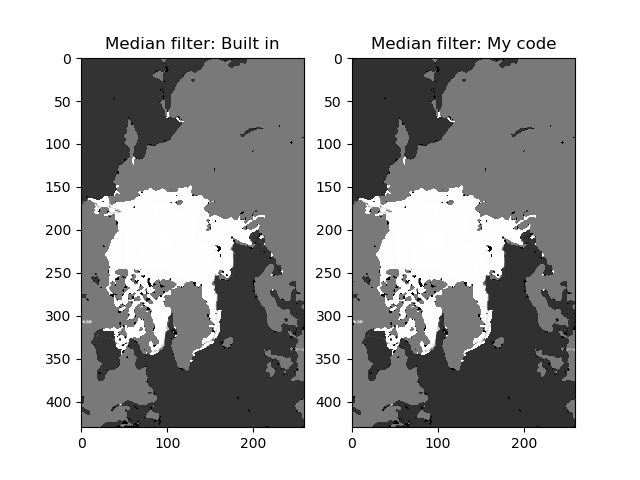

Text(0.5,1,'Median filter: My code')

In [20]:
A_medfilt = medfilt(A_bw_dirty)

plt.figure()
plt.subplot(121)
plt.imshow(A_medfilt,cmap='gray')
plt.title('Median filter: Built in')

plt.subplot(122)
plt.imshow(A_clean,cmap='gray')
plt.title('Median filter: My code')



### 2.2.7. (Advanced) Write the median filter into a function: medianfilter

430
260


<IPython.core.display.Javascript object>


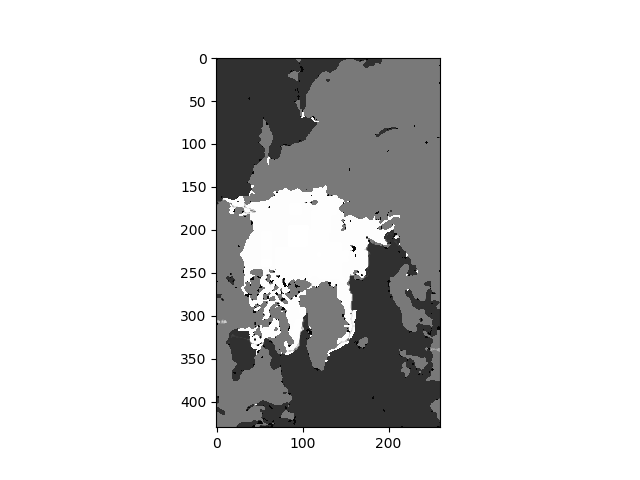

In [21]:
 def medianfilter(A):
    A_clean = copy.deepcopy(A)
    m = A.shape[0]; n = A.shape[1]; print(m); print(n)
    for i in range(m):
        for j in range(n):

            # The 3-by-3 matrix of neighbor
            iMin = np.max([1, i - 1])
            iMax = np.min([m, i + 2])
            jMin = np.max([1, j - 1])
            jMax = np.min([n, j + 2])
            Neighbors = A[iMin : iMax, jMin : jMax]

            # The median value
            # : convert matrix into 1-dimension array (column-major)
            A_clean[i, j] = copy.deepcopy(np.median(Neighbors[:]))
            
    return A_clean
        
A_fun = medianfilter(A_bw_dirty)
plt.figure()
plt.imshow(A_fun,cmap='gray')